# Preparação do ambiente para realizar a análise de dados com pyspark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive")

In [ ]:
!ls

 bq-results-20230331-115425-1680266314785   sd254_cards.csv
'Colab Notebooks'			    sd254_users.csv
 EXP.csv				   'teste  ideia2001'
 fakefriends_df.ipynb			    User0_credit_card_transactions.csv
 projetobigqueryinfnet.csv		    xxxxxxxxxxx.png
 Projeto_Machine_Learning


In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
from pyspark.sql.functions import col, avg, when, mean

In [ ]:
spark = SparkSession.builder.appName("cards").master('local[*]').getOrCreate()

In [ ]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType

In [ ]:
#Defição do esquema
schema = StructType([
    StructField("Card_Index", IntegerType()),
    StructField("Card_Brand", StringType()),
    StructField("Card_Type", StringType()),
    StructField("Card_Number", StringType()),
    StructField("Expires", StringType()),
    StructField("CVV", StringType()),
    StructField("Has_Chip", StringType()),
    StructField("Cards_Issued", IntegerType()),
    StructField("Credit_Limit", DoubleType()),
    StructField("Acct_Open_Date", StringType()),
    StructField("Year_PIN_Last_Changed", IntegerType()),
    StructField("Card_on_Dark_Web", StringType())
])

In [ ]:
#Carregamento dos dados com o esquema definido
df_cards = spark.read.csv(path='sd254_cards.csv')

In [ ]:
#Exibição do dataframe
df_cards.show()

+----+----------+----------+---------------+----------------+-------+---+--------+------------+------------+--------------+--------------------+----------------+
| _c0|       _c1|       _c2|            _c3|             _c4|    _c5|_c6|     _c7|         _c8|         _c9|          _c10|                _c11|            _c12|
+----+----------+----------+---------------+----------------+-------+---+--------+------------+------------+--------------+--------------------+----------------+
|User|CARD INDEX|Card Brand|      Card Type|     Card Number|Expires|CVV|Has Chip|Cards Issued|Credit Limit|Acct Open Date|Year PIN last Cha...|Card on Dark Web|
|   0|         0|      Visa|          Debit|4344676511950444|12/2022|623|     YES|           2|      $24295|       09/2002|                2008|              No|
|   0|         1|      Visa|          Debit|4956965974959986|12/2020|393|     YES|           2|      $21968|       04/2014|                2014|              No|
|   0|         2|      Visa|

In [ ]:
df_cards.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)



# Realização de consultas usando o pyspark

In [ ]:
#Consulta para saber o número médio de cartões emitidos por marca de cartão:
result = df_cards.groupBy("_c2").agg(avg(col("_c8")).alias("Avg_Cards_Issued"))
result.show()

+----------+------------------+
|       _c2|  Avg_Cards_Issued|
+----------+------------------+
|  Discover|1.4880382775119618|
|Card Brand|              null|
|      Visa| 1.504299226139295|
|Mastercard|1.5020255531318167|
|      Amex|1.5124378109452736|
+----------+------------------+



In [ ]:
#Consulta para saber o número médio de cartões emitidos por tipo de cartão:
result2 = df_cards.groupBy("_c3").agg(avg(col("_c8")).alias("Avg_Cards_Issued"))
result2.show()

+---------------+------------------+
|            _c3|  Avg_Cards_Issued|
+---------------+------------------+
|      Card Type|              null|
|         Credit| 1.511424404472533|
|Debit (Prepaid)|1.5103806228373702|
|          Debit| 1.497009399031615|
+---------------+------------------+



In [ ]:
#Defição do esquema
schema = StructType([
    StructField("Current_Age", IntegerType()),
    StructField("Retirement_Age", IntegerType()),
    StructField("Birth_Year", IntegerType()),
    StructField("Gender", StringType()),
    StructField("Address", StringType()),
    StructField("Apartment", StringType()),
    StructField("City", StringType()),
    StructField("State", StringType()),
    StructField("Zipcode", StringType()),
    StructField("Latitude", DoubleType()),
    StructField("Longitude", DoubleType()),
    StructField("Per_Capita_Income", DoubleType()),
    StructField("Yearly_Income", DoubleType()),
    StructField("Total_Debt", DoubleType()),
    StructField("FICO_Score", IntegerType()),
    StructField("Num_Credit_Cards", IntegerType())
])

In [ ]:
#Carregamento dos dados com o esquema definido
df_users = spark.read.csv("sd254_users.csv")

In [ ]:
#Exibição do dataframe
df_users.show()

+--------------+-----------+--------------+----------+-----------+------+--------------------+---------+-------------+-----+-------+--------+---------+--------------------+--------------------+----------+----------+----------------+
|           _c0|        _c1|           _c2|       _c3|        _c4|   _c5|                 _c6|      _c7|          _c8|  _c9|   _c10|    _c11|     _c12|                _c13|                _c14|      _c15|      _c16|            _c17|
+--------------+-----------+--------------+----------+-----------+------+--------------------+---------+-------------+-----+-------+--------+---------+--------------------+--------------------+----------+----------+----------------+
|        Person|Current Age|Retirement Age|Birth Year|Birth Month|Gender|             Address|Apartment|         City|State|Zipcode|Latitude|Longitude|Per Capita Income...|Yearly Income - P...|Total Debt|FICO Score|Num Credit Cards|
|Hazel Robinson|         53|            66|      1966|         11|Fe

In [ ]:
#Consulta para saber o total de usuários por cidade:
result3 = df_users.groupBy("_c8").count().withColumnRenamed("count", "Total_Users")
result3.show()

+---------------+-----------+
|            _c8|Total_Users|
+---------------+-----------+
|          Tyler|          2|
|   Saint George|          3|
|      Worcester|          1|
|        Kilauea|          1|
|       Bluffton|          1|
|          Owego|          1|
|     Prattville|          1|
|        Edmonds|          1|
|     Harrisburg|          1|
|    Springfield|          5|
|          Tempe|          1|
|     Charleston|          5|
|  Bowling Green|          2|
|         Corona|          2|
|  Lawrenceville|          2|
|        Batavia|          1|
|North Las Vegas|          1|
|     Wellington|          1|
|         Auburn|          2|
|       Napoleon|          1|
+---------------+-----------+
only showing top 20 rows



In [ ]:
#Consulta para saber a média de idade dos usuários por cidade:
result4 = df_users.groupBy("_c8").agg(avg(col("_c1")).alias("Avg_Age"))
result4.show()

+---------------+-------+
|            _c8|Avg_Age|
+---------------+-------+
|          Tyler|   37.5|
|   Saint George|   45.0|
|      Worcester|   48.0|
|        Kilauea|   37.0|
|       Bluffton|   79.0|
|          Owego|   43.0|
|     Prattville|   28.0|
|        Edmonds|   81.0|
|     Harrisburg|   31.0|
|    Springfield|   47.0|
|          Tempe|   22.0|
|     Charleston|   49.6|
|  Bowling Green|   61.0|
|         Corona|   32.0|
|  Lawrenceville|   43.0|
|        Batavia|   47.0|
|North Las Vegas|   23.0|
|     Wellington|   44.0|
|         Auburn|   51.0|
|       Napoleon|   59.0|
+---------------+-------+
only showing top 20 rows



In [ ]:
#Consulta para saber o número médio de cartões de crédito por faixa etária:
age_group_data = df_users.withColumn(
    "Age_Group",
    when((col("_c1") >= 18) & (col("_c1") <= 30), "18-30")
    .when((col("_c1") >= 31) & (col("_c1") <= 45), "31-45")
    .when((col("_c1") >= 46) & (col("_c1") <= 60), "46-60")
    .otherwise("60+")
)

result5 = age_group_data.groupBy("Age_Group").agg(mean(col("_c17")).alias("Avg_Num_Cards"))
result5.show()

+---------+------------------+
|Age_Group|     Avg_Num_Cards|
+---------+------------------+
|    31-45|2.8275193798449614|
|    46-60| 3.348314606741573|
|      60+| 4.195348837209302|
|    18-30| 2.105769230769231|
+---------+------------------+



In [ ]:
#Definição o esquema para df_transactions
schema = StructType([
    StructField("Card", StringType()),
    StructField("Year", IntegerType()),
    StructField("Month", StringType()),
    StructField("Day", IntegerType()),
    StructField("Tempo", StringType()),
    StructField("Amount", DoubleType()),
    StructField("Use_Chip", StringType()),
    StructField("Merchant_Name", StringType()),
    StructField("Merchant_State", StringType()),
    StructField("Zip", StringType()),
    StructField("MCC", StringType()),
    StructField("Errors", StringType()),
    StructField("Is_Fraud", StringType())
])

#Carregamento os dados do arquivo CSV com o esquema definido
df_transactions = spark.read.csv("User0_credit_card_transactions.csv")

In [ ]:
#Exibição do dataframe
df_transactions.show()

+----+----+----+-----+---+-----+-------+------------------+--------------------+-------------+--------------+-------+----+-------+---------+
| _c0| _c1| _c2|  _c3|_c4|  _c5|    _c6|               _c7|                 _c8|          _c9|          _c10|   _c11|_c12|   _c13|     _c14|
+----+----+----+-----+---+-----+-------+------------------+--------------------+-------------+--------------+-------+----+-------+---------+
|User|Card|Year|Month|Day| Time| Amount|          Use Chip|       Merchant Name|Merchant City|Merchant State|    Zip| MCC|Errors?|Is Fraud?|
|   0|   0|2002|    9|  1|06:21|$134.09| Swipe Transaction| 3527213246127876953|     La Verne|            CA|91750.0|5300|   null|       No|
|   0|   0|2002|    9|  1|06:42| $38.48| Swipe Transaction| -727612092139916043|Monterey Park|            CA|91754.0|5411|   null|       No|
|   0|   0|2002|    9|  2|06:22|$120.34| Swipe Transaction| -727612092139916043|Monterey Park|            CA|91754.0|5411|   null|       No|
|   0|   0|20

In [ ]:
#Consulta para saber o número médio de transações por dia da semana:
result6 = df_transactions.groupBy("_c4").count().withColumnRenamed("count", "Num_Transactions")
result6.show()

+---+----------------+
|_c4|Num_Transactions|
+---+----------------+
|  7|             584|
| 15|             706|
| 11|             666|
| 29|             635|
|  3|             643|
| 30|             580|
|  8|             638|
| 22|             640|
| 28|             687|
| 16|             663|
|  5|             666|
| 31|             388|
| 18|             644|
| 27|             645|
| 17|             625|
| 26|             671|
|  6|             643|
| 19|             646|
| 23|             658|
| 25|             659|
+---+----------------+
only showing top 20 rows



In [ ]:
#Consulta para saber o total de transações por ano e por mês:
result7 = df_transactions.groupBy("_c2", "_c3").count().withColumnRenamed("count", "Total_Transactions")
result7.show()

+----+---+------------------+
| _c2|_c3|Total_Transactions|
+----+---+------------------+
|2014|  2|                82|
|2012| 11|                97|
|2014| 11|                99|
|2003|  9|                83|
|2010|  1|               105|
|2014|  8|                96|
|2010|  3|                93|
|2017|  7|               109|
|2012|  7|               108|
|2010|  4|               109|
|2014|  5|                97|
|2007|  7|                95|
|2009| 11|                93|
|2005|  5|               106|
|2011|  4|                82|
|2016|  7|                72|
|2012|  8|                96|
|2014| 12|                98|
|2015| 11|               102|
|2007|  9|               100|
+----+---+------------------+
only showing top 20 rows



In [ ]:
#Consulta para saber o número de transações por cidade do comerciante:
result8 = df_transactions.groupBy("_c9").count().withColumnRenamed("count", "Num_Transactions")
result8.show()

+---------------+----------------+
|            _c9|Num_Transactions|
+---------------+----------------+
|      Worcester|               1|
|         Corona|               6|
|North Las Vegas|               8|
|     Wellington|               3|
|     West Hills|               2|
|       Cranford|               3|
|       Mableton|              21|
|    New Buffalo|               5|
|       Oak Park|               2|
|       Sterling|               2|
|      Palo Alto|              36|
|        Hanford|               2|
|      Anchorage|              24|
| West Henrietta|               4|
|  Central Islip|               2|
|        Cabazon|               1|
|        Wolcott|               3|
|        Anaheim|               8|
|        Bayside|               2|
|   Lincoln Park|              16|
+---------------+----------------+
only showing top 20 rows



In [ ]:
#Consulta para saber o total de transações por cidade e por mês:
result9 = df_transactions.groupBy("_c9", "_c3").count().withColumnRenamed("count", "Num_Transactions")
result9.show()

+----------------+---+----------------+
|             _c9|_c3|Num_Transactions|
+----------------+---+----------------+
|         Ontario|  4|               8|
|      Williamson| 12|               3|
|      Shrewsbury|  1|               2|
|        La Verne|  3|             915|
|   Spring Valley|  9|               8|
|         Ontario|  9|               7|
|      Sun Valley| 11|               2|
|     Pico Rivera| 10|               4|
|    Garden Grove|  1|               2|
|          ONLINE|  4|             107|
|          ONLINE|  6|              97|
|       Hawthorne|  3|              16|
|       San Mateo|  5|               4|
|            Rome| 12|              32|
|          Oxford|  1|               6|
|         Detroit| 10|              19|
|Huntington Beach|  8|               2|
|          Austin|  5|               9|
|     Diamond Bar|  7|               5|
|     Yorba Linda| 11|               8|
+----------------+---+----------------+
only showing top 20 rows



# Realização de consultas que não estavam presentes no projeto Hadoop

In [ ]:
#Consulta bônus - Calcule o número total de transações fraudulentas
total_fraudulentas = df_transactions.filter(col("_c14") == "Yes").count()
print(f"O número total de cartões fraudulentos é: {total_fraudulentas}")

O número total de cartões fraudulentos é: 27


In [ ]:
#Consulta bônus - Calcule o número total de transações não fraudulentas
total_nao_fraudulentas = df_transactions.filter(col("_c14") == "No").count()
print(f"O número total de cartões não fraudulentos é: {total_nao_fraudulentas}")

O número total de cartões não fraudulentos é: 19936


# Geração de gráficos a partir das novas consultas

In [ ]:
#Importação de biblioteca para geração de gráficos
import matplotlib.pyplot as plt

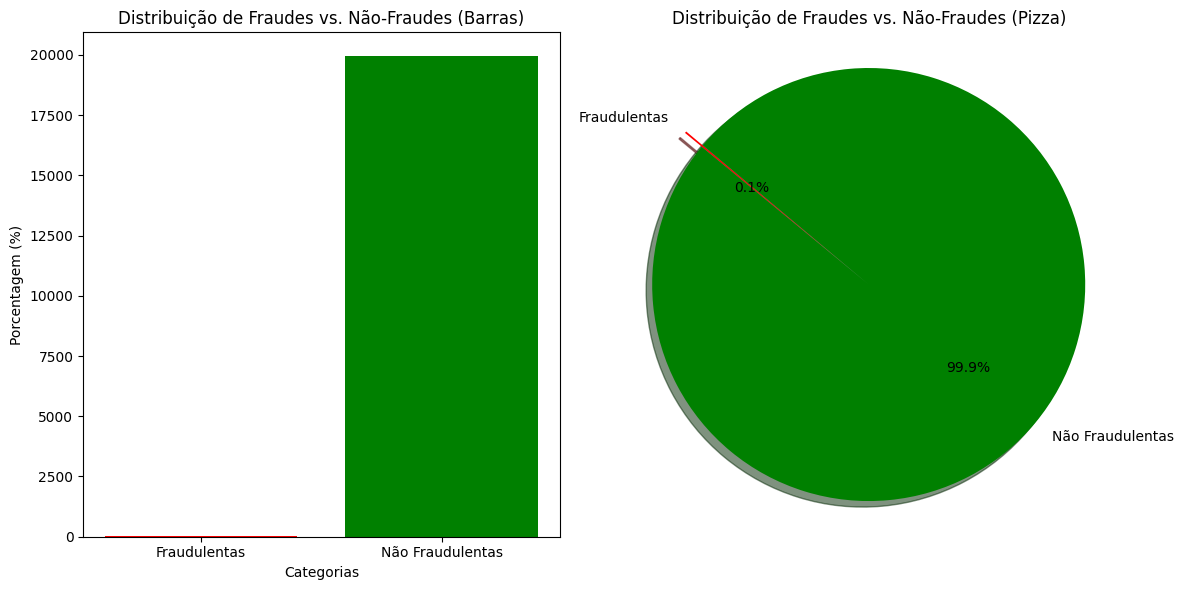

In [ ]:
#Dados para o gráfico de pizza
labels_pizza = ["Fraudulentas", "Não Fraudulentas"]
sizes_pizza = [total_fraudulentas, total_nao_fraudulentas]
colors_pizza = ["red", "green"]
explode_pizza = (0.1, 0)  # Explode a primeira fatia (fraudes)

#Dados para o gráfico de barras
categorias_bar = ["Fraudulentas", "Não Fraudulentas"]
percentagens_bar = [total_fraudulentas, total_nao_fraudulentas]

#Crieação de uma figura com dois subplots (gráfico de barras à esquerda, gráfico de pizza à direita)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Primeiro subplot: gráfico de barras (à esquerda)
axs[0].bar(categorias_bar, percentagens_bar, color=['red', 'green'])
axs[0].set_xlabel("Categorias")
axs[0].set_ylabel("Porcentagem (%)")
axs[0].set_title("Distribuição de Fraudes vs. Não-Fraudes (Barras)")

#Segundo subplot: gráfico de pizza (à direita)
axs[1].pie(sizes_pizza, explode=explode_pizza, labels=labels_pizza, colors=colors_pizza, autopct="%1.1f%%", shadow=True, startangle=140)
axs[1].axis("equal")  # Aspecto igual para garantir que seja um círculo
axs[1].set_title("Distribuição de Fraudes vs. Não-Fraudes (Pizza)")

#Ajuste o espaçamento entre os subplots
plt.tight_layout()

#Exibição dos gráficos
plt.show()